# CROSS VALİDATİON

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [140]:
df = pd.read_excel("diyabet.xlsx")

In [141]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [142]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [143]:
df.isna().sum

<bound method DataFrame.sum of        AGE    SEX    BMI     BP     S1     S2     S3     S4     S5     S6  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
437  False  False  False  False  False  False  False  False  False  False   
438  False  False  False  False  False  False  False  False  False  False   
439  False  False  False  False  False  False  False  False  False  False   
440  False  False  False  False  False  False  False  False  False  False   
441  False  False  False  False  False  False  False  False  False  False   

         Y  
0    False  
1    False  
2    

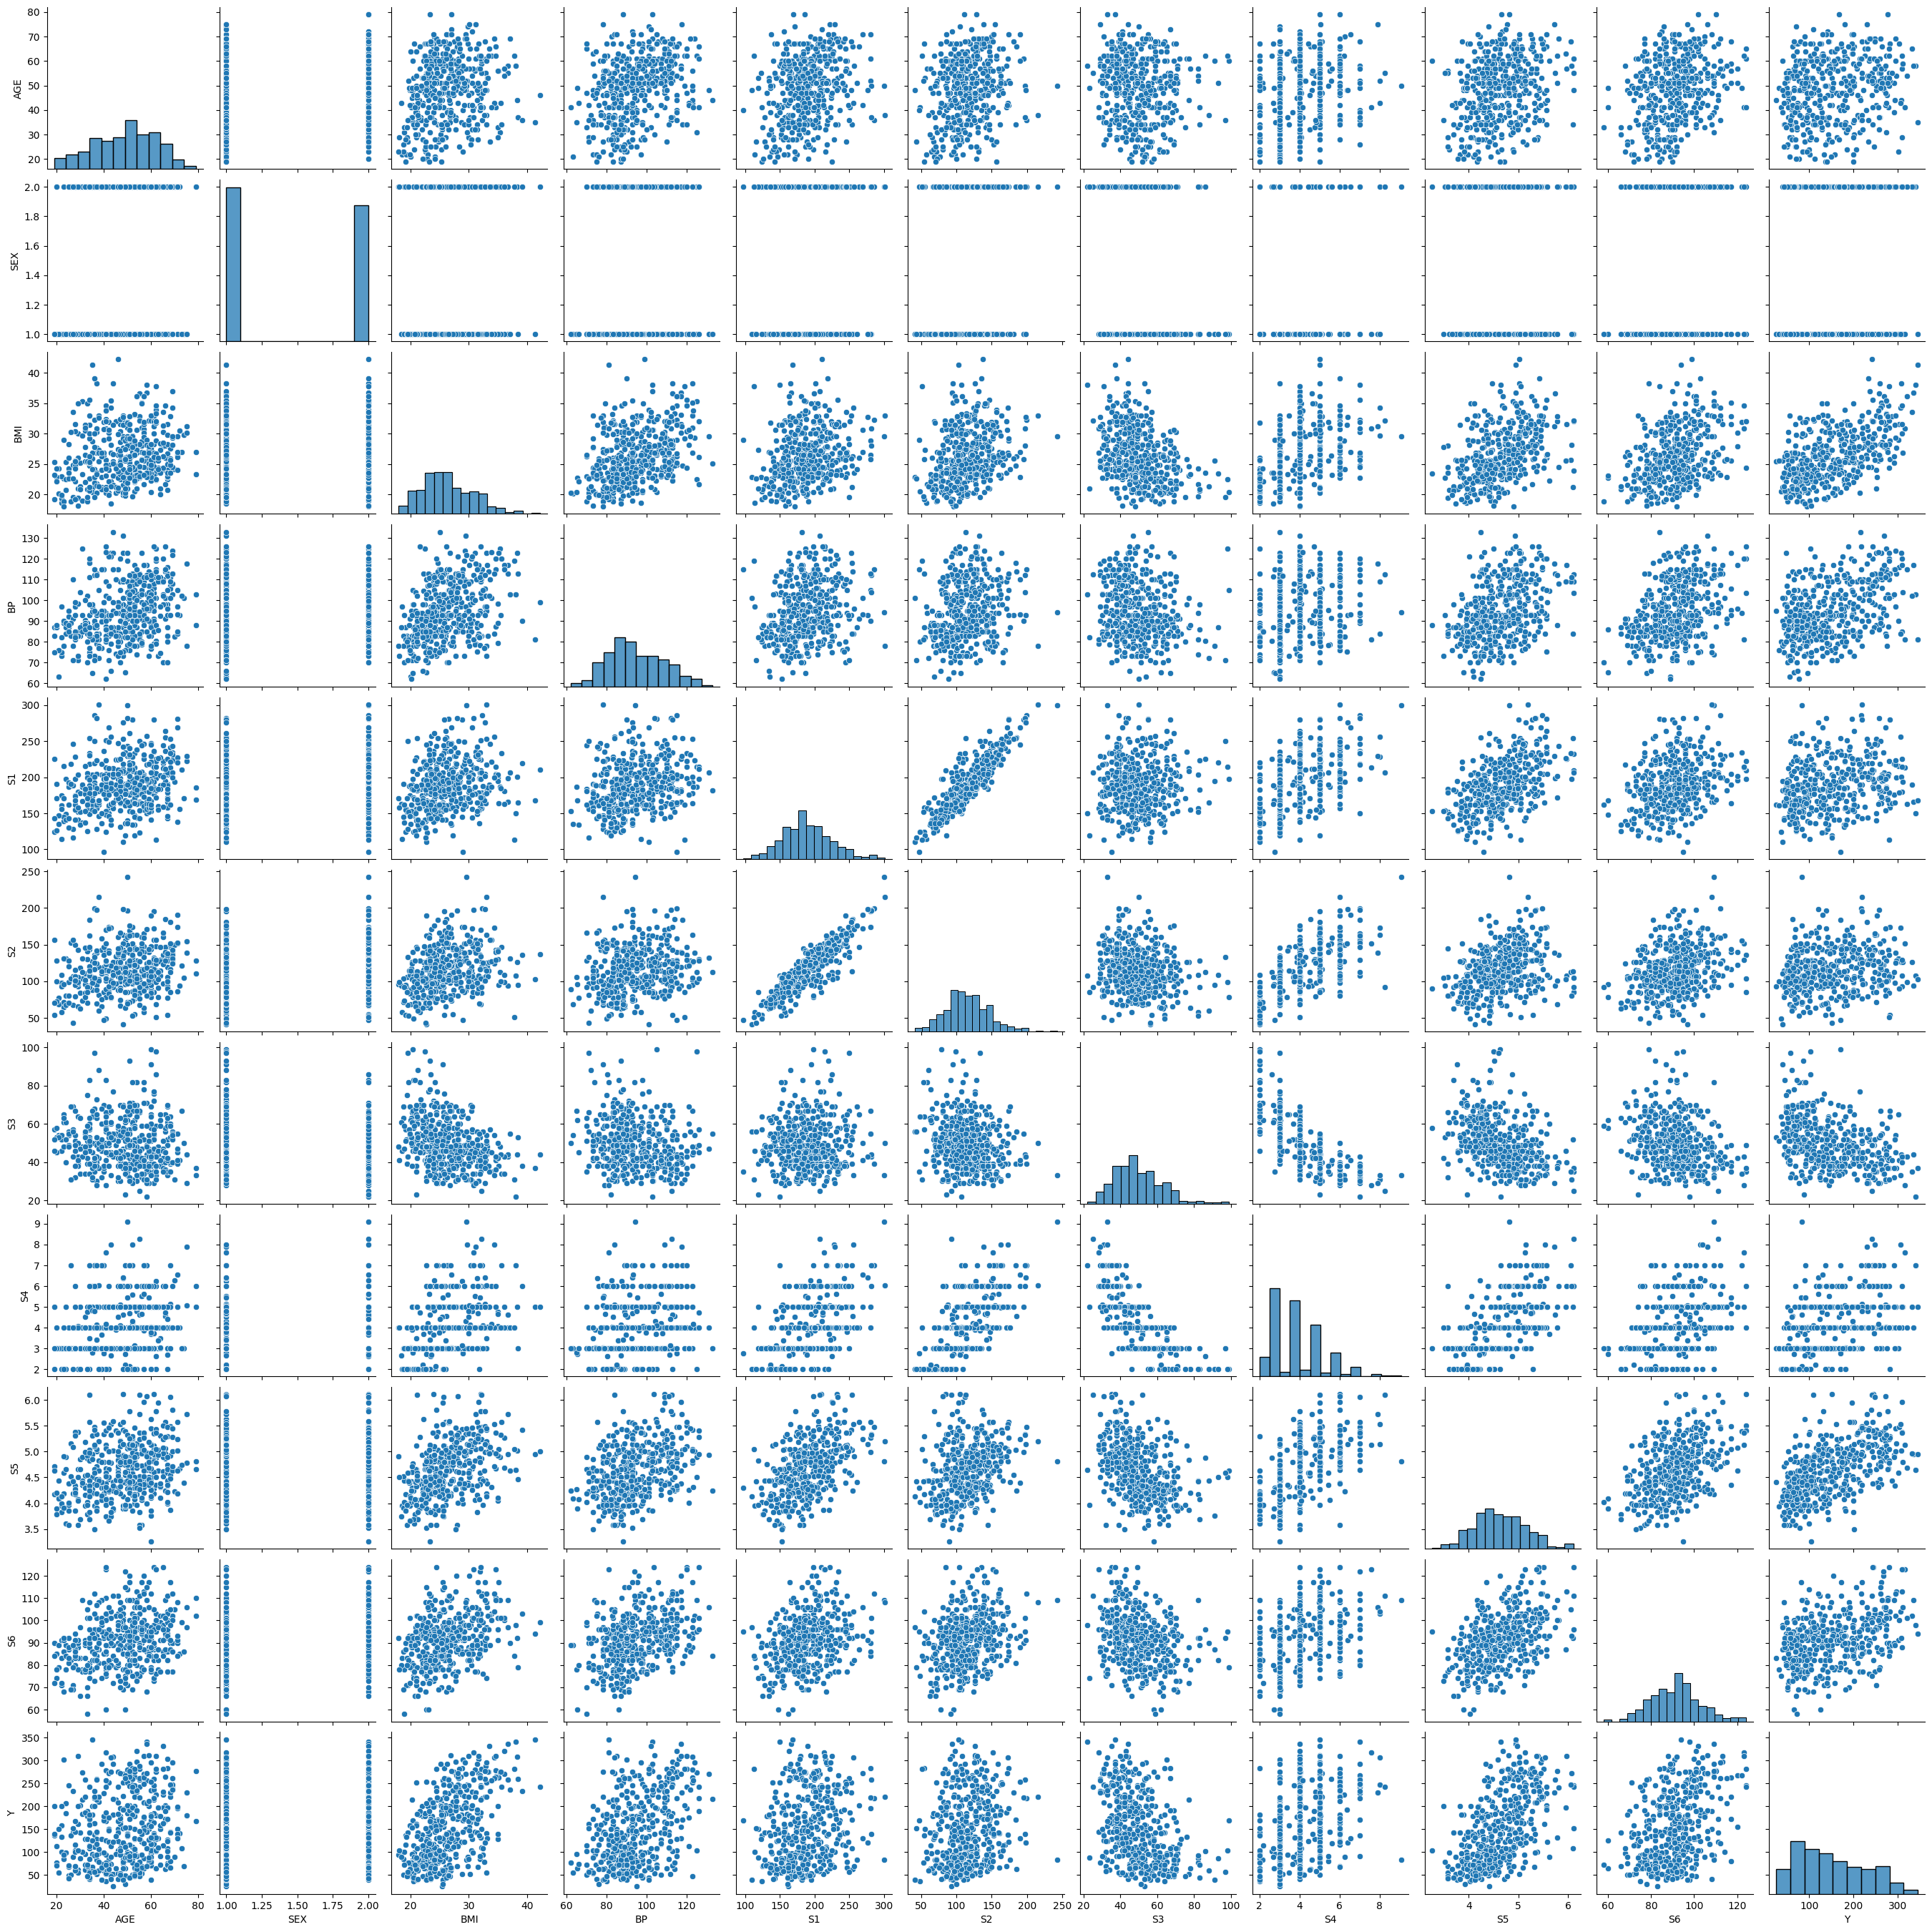

In [144]:
sns.pairplot(df)

# ÖZET 

1. Verileri düzenle ve kontrol et 
2. EDA(keşifçi veri analizi)
3. X ve y ye verileri ata 
4. Verileri Ölçekle ( eğer gerekliyse )
5. Train Test Split ve model oluştur
6. Train verisini fit_transform ile ekle
7. .predict() modeli tahminle
8. Hata metrikleri ile kontrolleri yap
9. parametreleri düzenle ve 6. adıma geri dön


# Train test split

In [145]:
df.drop("Y",axis=1,inplace=True)

In [146]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [147]:
x = df.drop("S6", axis =1)
y = df["S6"]

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
   x, y, test_size=0.3, random_state=9)

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model oluşturma

In [152]:
from sklearn.linear_model import Ridge

In [153]:
model = Ridge(alpha=1)

In [154]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [155]:
y_pred = model.predict(X_test)

In [156]:
from sklearn.metrics import mean_squared_error,r2_score

In [157]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test ,y_pred ))

9.671527590544297
0.2402752150983366


In [158]:
df["S6"].mean() , df["S6"].std()

(np.float64(91.26018099547511), np.float64(11.496334739334172))

## Parametleri düzenle

In [159]:
model = Ridge(alpha=103)

In [160]:
model.fit(X_train, y_train)

Ridge(alpha=103)

In [161]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


np.float64(9.387390180879775)

# Train Test Validation

In [ ]:
X_train , x_tv , y_train , y_tv = train_test_split(x,y,test_size=0.3 , random_state=9)
# İlk olarak, veriyi %70 eğitim (%30 test+validasyon) olacak şekilde ayırıyorsun:

In [163]:
x_eval, x_test , y_eval, y_test = train_test_split(x_tv , y_tv , test_size=0.5 , random_state=9)
# Yarısı y yarısı x e gitsin diye 

In [ ]:
X_train.shape # Eğitim % 70

(309, 9)

In [ ]:
x_eval.shape # % 15 doğrulama

(66, 9)

In [179]:
x_test.shape # %15 test

(67, 9)

In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)
x_eval = scaler.transform(x_eval)
# Burada önemli nokta: scaler.fit(X_train) sadece eğitim verisi üzerinde fit edilmelidir.

In [168]:
model = Ridge(alpha=103)
model.fit(X_train , y_train)
y_eval_pred = model.predict(x_eval)

In [169]:
np.sqrt(mean_squared_error(y_eval,y_eval_pred))
# Modelin daha iyiye gitmediğini anlayabiliriz

np.float64(9.654368565779013)

In [170]:
y_final = model.predict(x_test)

In [171]:
np.sqrt(mean_squared_error(y_test,y_final))

np.float64(9.116755623507686)

# CROSS VALİDATİON

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
   x, y, test_size=0.3, random_state=9)

In [173]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)


C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [174]:
model = Ridge(alpha=103)

In [175]:
from sklearn.model_selection import cross_val_score

In [176]:
score = cross_val_score(model , X_train , y_train , scoring="neg_mean_squared_error" , cv=6)

In [177]:
score

array([ -56.26312593,  -84.9389757 ,  -83.43470906, -123.84601382,
        -92.87053721, -128.52690068])

In [178]:
np.sqrt(abs(score.mean()))
# Rastgeleliği ortadan kaldırdığımızda çıkan veri

np.float64(9.745770556112978)